**Dataset description**

Dataset
Data was collected from different hospitals, community clinics, maternal health care centers in Bangladesh through an IoT based risk monitoring system.

**Age:** Age in years when a woman is pregnant.

**SystolicBP:** Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.

**DiastolicBP:** Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.

**BS:** Blood glucose levels is in terms of a molar concentration, mmol/L.

**HeartRate:** A normal resting heart rate in beats per minute.

**Risk Level:** Predicted Risk Intensity Level during pregnancy considering the previous attributes.

link to the dataset https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
#upload the dataset
!wget https://raw.githubusercontent.com/Marconi-Lab/giz_ml_2024/main/tabular/Maternal%20Health%20Risk%20Data%20Set.csv

--2025-11-14 08:02:45--  https://raw.githubusercontent.com/Marconi-Lab/giz_ml_2024/main/tabular/Maternal%20Health%20Risk%20Data%20Set.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30290 (30K) [text/plain]
Saving to: ‘Maternal Health Risk Data Set.csv’

Maternal Health Ris 100%[===================>]  29.58K  --.-KB/s    in 0.009s  

2025-11-14 08:02:46 (3.33 MB/s) - ‘Maternal Health Risk Data Set.csv’ saved [30290/30290]



In [ ]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

In [ ]:
#check for data_types
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
#check for null values
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 562


In [ ]:
df_copy = df.copy() # Make a copy of the original dataset
df_copy.head()

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

In [ ]:
df = df.drop_duplicates()

In [ ]:
#map risk level to numerical values

RiskLevel = {'low risk':0,
        'mid risk':1,
        'high risk':2}

# apply using map
df['RiskLevel'] = df['RiskLevel'].map(RiskLevel).astype(int)
df

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0     25         130           80  15.0      98.0         86          2
1     35         140           90  13.0      98.0         70          2
2     29          90           70   8.0     100.0         80          2
3     30         140           85   7.0      98.0         70          2
4     35         120           60   6.1      98.0         76          0
..   ...         ...          ...   ...       ...        ...        ...
673   12         100           50   6.4      98.0         70          1
674   15         100           60   6.0      98.0         80          0
703   15         100           49   7.6      98.0         77          0
704   12         100           50   6.0      98.0         70          1
705   21         100           50   6.8      98.0         60          0

[452 rows x 7 columns]

In [ ]:
#check for class balance
df['RiskLevel'].value_counts()

RiskLevel
0    234
2    112
1    106
Name: count, dtype: int64

/tmp/ipython-input-803333346.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RiskLevel', data=df, palette='viridis')


<Axes: xlabel='RiskLevel', ylabel='count'>

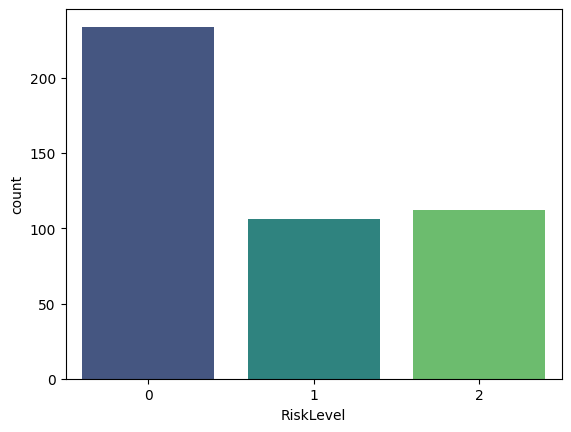

In [ ]:
sns.countplot(x='RiskLevel', data=df, palette='viridis')

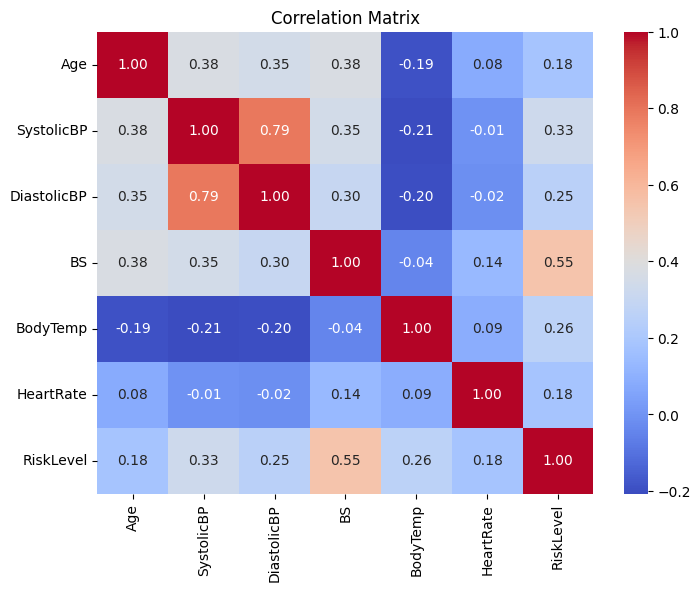

In [ ]:
#check for correlation of different features
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#perform test and train split for model training
X = df.drop('RiskLevel',axis=1)
y = df['RiskLevel']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                               random_state=42)

In [ ]:
print(f'Training Shape x:',X_train.shape)
print(f'Testing Shape x:',X_test.shape)
print('*****___________*****___________*****')
print(f'Training Shape y:',X.shape)
print(f'Testing Shape y:',y.shape)

Training Shape x: (316, 6)
Testing Shape x: (136, 6)
*****___________*****___________*****
Training Shape y: (452, 6)
Testing Shape y: (452,)


In [ ]:
#Normalize data using StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_test= ss.transform(X_test)

In [ ]:
print(f'Testing Shape x:',X_test.shape)

Testing Shape x: (136, 6)


In [ ]:
#Train decision tree model
#Applying Decision Tree
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train, y_train)

print("Train accuracy:",decision_tree.score(X_train,y_train))
print("Test accuracy:",decision_tree.score(X_test,y_test))

y_pred = decision_tree.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, decision_tree.predict(X_test)))

Train accuracy: 0.9430379746835443
Test accuracy: 0.6176470588235294
[2 0 1 1 1 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 1 0 0 0 0 0 1 1 0
 1 1 0 1 1 0 1 1 2 1 2 1 0 0 0 1 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 1 2 2 0 1
 2 0 0 0 1 2 1 1 1 0 0 1 1 0 0 0 0 0 2 2 1 1 0 0 2 0 1 1 1 0 1 0 1 0 2 1 2
 0 1 0 0 0 2 2 0 1 2 1 0 0 1 0 2 0 2 1 2 0 2 0 0 2]
CM: [[49 13  3]
 [19 15  5]
 [ 3  9 20]]
Accuracy: 61.76470588235294 %
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        65
           1       0.41      0.38      0.39        39
           2       0.71      0.62      0.67        32

    accuracy                           0.62       136
   macro avg       0.60      0.59      0.59       136
weighted avg       0.61      0.62      0.61       136



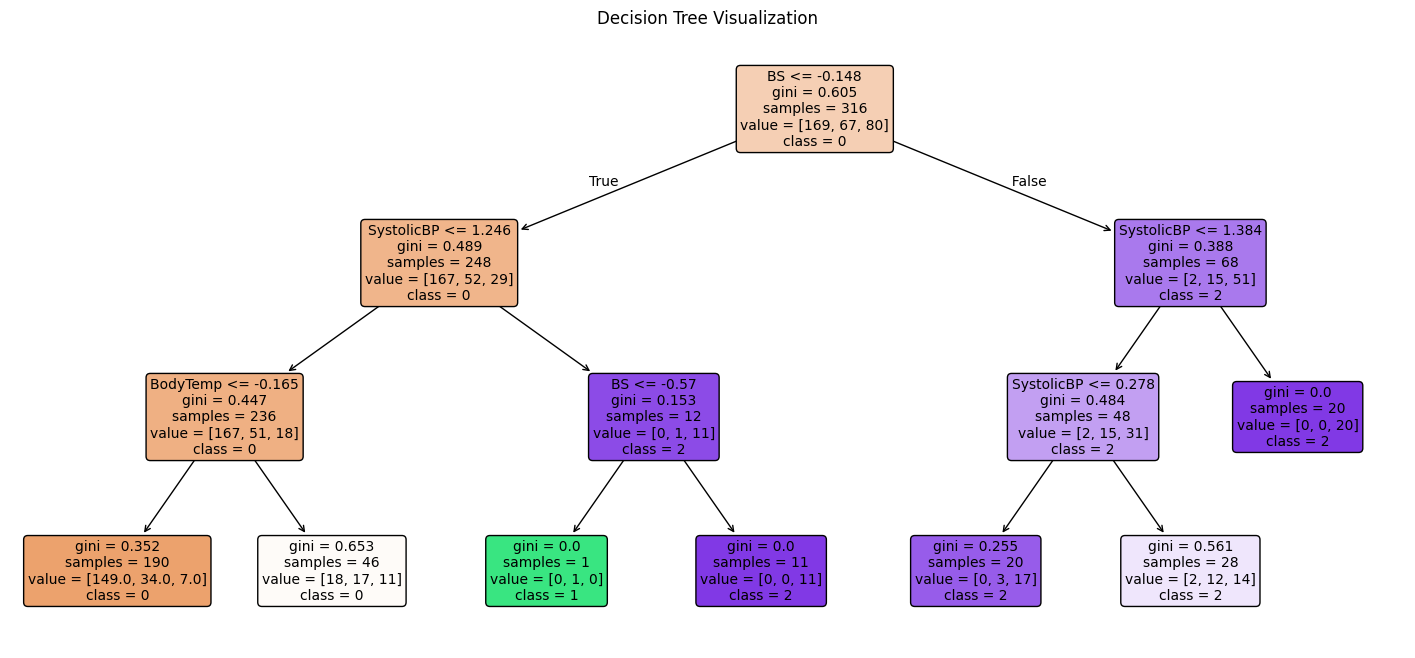

In [ ]:

# Text-based tree structure
feature_names = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
class_names = np.unique(y_train).astype(str)

decision_tree_view = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)

# Retrain using your existing split
decision_tree_view.fit(X_train, y_train)

# Plot
plt.figure(figsize=(18, 8))
tree.plot_tree(
    decision_tree_view,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
#Applying RandomForest
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train, y_train)

print("Train accuracy:",random_forest.score(X_train,y_train))
print("Test accuracy:",random_forest.score(X_test,y_test))

y_pred = random_forest.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, random_forest.predict(X_test)))

Train accuracy: 0.9430379746835443
Test accuracy: 0.6544117647058824
[2 0 1 1 1 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 1 0 2 2 0 0 0 1 0 0 0 0 1 0 0 0
 1 2 0 0 1 0 1 0 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 2 2 0 1
 2 0 0 0 0 2 2 1 1 0 0 0 0 0 0 0 1 0 2 2 1 1 1 0 2 0 1 2 1 0 2 0 0 0 2 1 2
 0 2 0 0 0 2 2 0 1 2 1 0 0 0 0 2 0 2 0 0 0 2 0 0 2]
CM: [[54  9  2]
 [25 10  4]
 [ 3  4 25]]
Accuracy: 65.44117647058823 %
              precision    recall  f1-score   support

           0       0.66      0.83      0.73        65
           1       0.43      0.26      0.32        39
           2       0.81      0.78      0.79        32

    accuracy                           0.65       136
   macro avg       0.63      0.62      0.62       136
weighted avg       0.63      0.65      0.63       136



In [ ]:
!pip install shap
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=12552f007e6d21524d346f475b4e98ec0e0244f5abedc76b11d240bf3d6152c1
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


# SHAP Analysis for Random Forest



In [ ]:
import shap

feature_names = ['Age','SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
class_names = ['low risk', 'mid risk', 'high risk']

explainer_dt = shap.TreeExplainer(decision_tree)
explainer_rf = shap.TreeExplainer(random_forest)

# Compute SHAP values for test data
shap_values_dt = explainer_dt.shap_values(X_test)
shap_values_rf = explainer_rf.shap_values(X_test)

# Convert list to numpy array with shape (136, 6, 3)
shap_array = np.array(shap_values_rf)

print("Original shap_array shape:", shap_array.shape)

# transpose axes to get (3 classes, 136 samples, 6 features)
shap_array = np.transpose(shap_array, (2, 0, 1))

print("Rearranged shap_array shape:", shap_array.shape)


Original shap_array shape: (136, 6, 3)
Rearranged shap_array shape: (3, 136, 6)


SHAP summary for : low risk


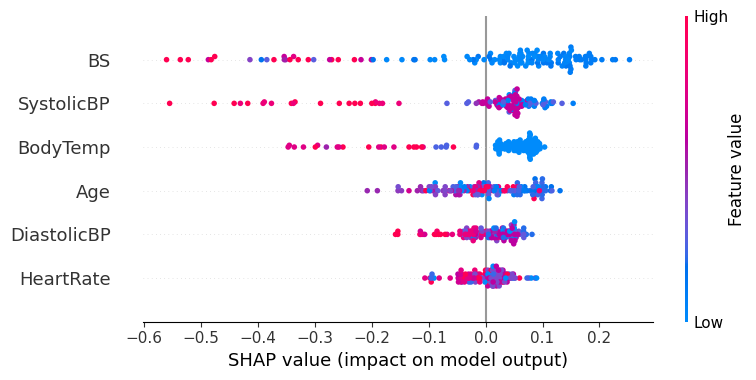

SHAP summary for : mid risk


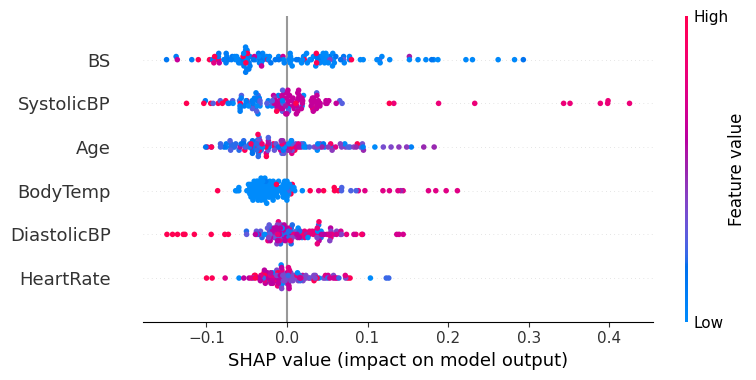

SHAP summary for : high risk


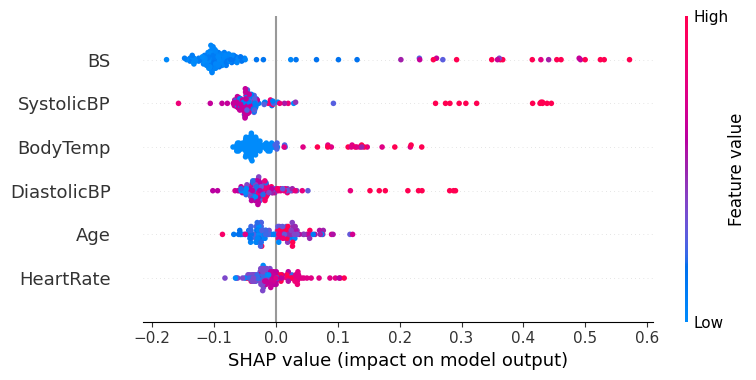

In [ ]:

# Reshape shap_values_rf from list of samples to list of classes
shap_array = np.array(shap_values_rf)
shap_array = np.transpose(shap_array, (2, 0, 1))

for class_index, class_name in enumerate(class_names):
    print(f"SHAP summary for : {class_name}")

    shap.summary_plot(
        shap_array[class_index],
        X_test,
        feature_names=feature_names,
        show=True,
        plot_type="dot",
        title=f"SHAP Summary for {class_name}"
    )

Systolic blood pressure and BS is the main driver of interaction effects in the model

**As seen from the above Beeswarm plot;**

* The features SystolicBP and BS (Blood Sugar) show the largest horizontal spread in SHAP values across the High and Low-Risk plots, making them the most significant features.




# SHAP Analysis for Decision Trees





In [ ]:
# Convert list to numpy array with shape (136, 6, 3)
shap_array = np.array(shap_values_dt)  # shape (136, 6, 3)

print("Original shap_array shape:", shap_array.shape)

# transpose axes to get (3 classes, 136 samples, 6 features)
shap_array = np.transpose(shap_array, (2, 0, 1))

print("Rearranged shap_array shape:", shap_array.shape)

Original shap_array shape: (136, 6, 3)
Rearranged shap_array shape: (3, 136, 6)


SHAP summary for : low risk


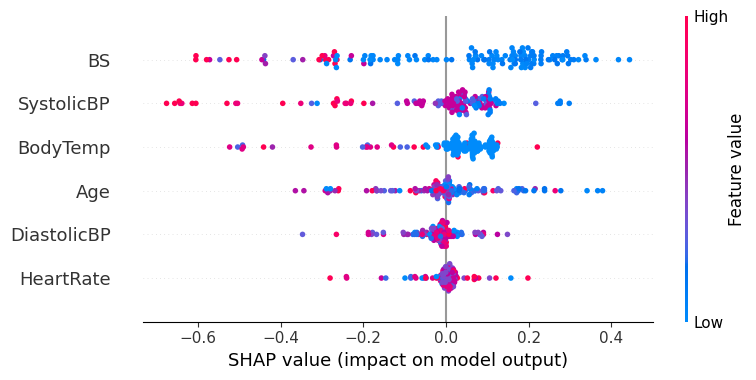

SHAP summary for : mid risk


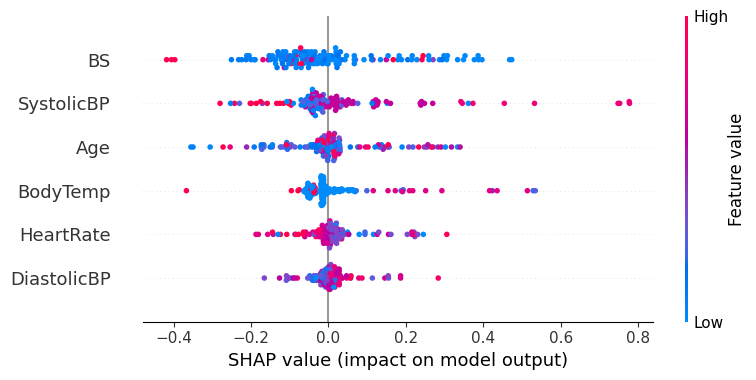

SHAP summary for : high risk


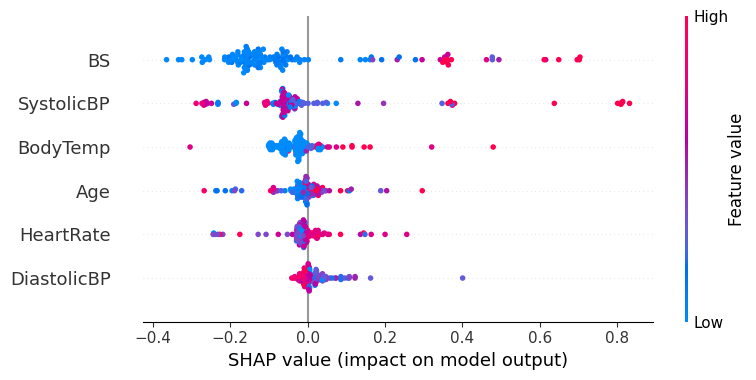

In [ ]:

# Convert shap_values_dt (list of arrays) to numpy array
shap_array_dt = np.array(shap_values_dt)

shap_array_dt = np.transpose(shap_array_dt, (2, 0, 1))

for class_index, class_name in enumerate(class_names):
    print(f"SHAP summary for : {class_name}")

    shap.summary_plot(
        shap_array_dt[class_index],
        X_test,
        feature_names=feature_names,
        show=True,
        plot_type="dot",
        title=f"Decision Tree SHAP Summary for {class_name}"
    )

The top features (Blood Sugar (BS), SystolicBP) were used in predicting maternal risk.

*   BS is the most significant feature for decision tree model, showing the highest magnitude of impact for all three classes (+0.8)
*   BSystolicBP remains highly critical, consistently ranking as the second most influential factor for maternal risk predictions.
*   Age and HeartRate: These remain the least influential features overall, with SHAP values rarely exceeding 0.2





In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the explainer
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names= feature_names,
    class_names=class_names,
    mode='classification'
)

# Pick a single observation from decision tree predictions
i = 1
exp = explainer.explain_instance(
    data_row=X_test[i],
    predict_fn=decision_tree.predict_proba,
    num_features=len(feature_names)
)

# Show the explanation
exp.show_in_notebook(show_table=True)

# Pick a single observation from random_forest predictions
i = 1
exp = explainer.explain_instance(
    data_row=X_test[i],
    predict_fn=random_forest.predict_proba,
    num_features=len(feature_names)
)

# Show the explanation
exp.show_in_notebook(show_table=True)


# **Feature Importance using LIME For Both Models**

*   Both Model local explanations confirm a high confidence for the low risk for the second patient.

*   Decision Tree: Assigned the highest possible confidence (probability of 1.00)

*   Random Forest: Assigned a slightly higher confidence (probability of 0.90) compared to the Decision Tree.

*   The same core features significantly influenced both model's decissions ie Blood Sugar(BS) and  Body Temperature (Bodytemp)

*   LIME indicates that Blood sugar was the single most significant factor in both models
*   A higher blood sugar level had the most significant contribution, pushing the prediction away from the mid risk category toward high risk.

*   Other features such as  Age, SystolicBP, and DiastolicBP exhibited smaller or opposing effects, their combined influence was not sufficient to shift the prediction away from high risk.




# **Difference between SHAP and LIME**

SHAP provided global prediction insights for both models across all patients. It tells us that, on average, high Blood Pressure and high Blood Sugar are the biggest risk drivers.

LIME focused on explaining single patients predictions by fitting local models around the given patient's data. It tells us that for this specific patient, the extremely low readings in their Blood Sugar and Body Temperature are the immediate, decisive factors that locally push the prediction to 100% confidence for the Low Risk class.

Both methods agree that Blood Sugar (BS) is the most crucial variable, but they highlight its impact differently (globally and locally)